In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

In [2]:
train_df = pd.read_csv(r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\train.csv")
train_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,X18_mean,X26_mean,X50_mean,X3112_mean,X4_sd,X11_sd,X18_sd,X26_sd,X50_sd,X3112_sd
0,192027691,12.235703,374.466675,62.524445,72.256844,773.592041,33.277779,125,149,136,...,0.117484,1.243779,1.849375,50.216034,0.008921,1.601473,0.025441,0.153608,0.279610,15.045054
1,195542235,17.270555,90.239998,10.351111,38.220940,859.193298,40.009777,124,144,138,...,0.389315,0.642940,1.353468,574.098472,0.003102,0.258078,0.000866,0.034630,0.010165,11.004477
2,196639184,14.254504,902.071411,49.642857,17.873655,387.977753,22.807142,107,133,119,...,8.552908,0.395241,2.343153,1130.096731,NaN,NaN,NaN,NaN,NaN,NaN
3,195728812,18.680834,1473.933350,163.100006,45.009758,381.053986,20.436666,120,131,125,...,1.083629,0.154200,1.155308,1042.686546,0.011692,2.818356,0.110673,0.011334,0.229224,141.857187
4,195251545,0.673204,530.088867,50.857777,38.230709,1323.526855,45.891998,91,146,120,...,0.657585,10.919966,2.246226,2386.467180,0.006157,1.128000,0.026996,0.553815,0.107092,87.146899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55484,190558785,19.472172,244.795914,39.127552,67.074493,472.710358,27.758673,118,140,131,...,0.233690,1.783193,1.608341,969.547831,NaN,NaN,NaN,NaN,NaN,NaN
55485,194523231,13.724150,1450.000000,162.260208,43.139324,652.716858,26.694387,125,144,135,...,1.017099,12.713048,2.418300,1630.015480,0.005474,0.128133,0.117010,3.164520,0.082212,136.503697
55486,195888987,14.741204,581.866638,109.231110,89.272148,507.273010,26.874668,118,155,136,...,2.717395,10.206478,2.722599,602.229880,0.019727,0.215040,0.156309,0.919139,0.079395,26.159626
55487,135487319,16.094763,1180.838135,80.176193,22.909716,342.184021,17.346189,109,130,117,...,4.429659,9.372170,3.251739,244.387170,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Columns: 176 entries, id to X3112_sd
dtypes: float64(54), int64(122)
memory usage: 74.5 MB


In [4]:
train_df.columns

Index(['id', 'WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO12_annual_precipitation',
       'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
       'WORLDCLIM_BIO15_precipitation_seasonality',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'WORLDCLIM_BIO7_temperature_annual_range',
       'SOIL_bdod_0.5cm_mean_0.01_deg', 'SOIL_bdod_100.200cm_mean_0.01_deg',
       'SOIL_bdod_15.30cm_mean_0.01_deg',
       ...
       'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean', 'X4_sd', 'X11_sd',
       'X18_sd', 'X26_sd', 'X50_sd', 'X3112_sd'],
      dtype='object', length=176)

In [5]:
test_df = pd.read_csv(r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\test.csv")
test_df

,id,WORLDCLIM_BIO1_annual_mean_temperature,WORLDCLIM_BIO12_annual_precipitation,WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month,WORLDCLIM_BIO15_precipitation_seasonality,WORLDCLIM_BIO4_temperature_seasonality,WORLDCLIM_BIO7_temperature_annual_range,SOIL_bdod_0.5cm_mean_0.01_deg,SOIL_bdod_100.200cm_mean_0.01_deg,SOIL_bdod_15.30cm_mean_0.01_deg,...,VOD_X_1997_2018_multiyear_mean_m03,VOD_X_1997_2018_multiyear_mean_m04,VOD_X_1997_2018_multiyear_mean_m05,VOD_X_1997_2018_multiyear_mean_m06,VOD_X_1997_2018_multiyear_mean_m07,VOD_X_1997_2018_multiyear_mean_m08,VOD_X_1997_2018_multiyear_mean_m09,VOD_X_1997_2018_multiyear_mean_m10,VOD_X_1997_2018_multiyear_mean_m11,VOD_X_1997_2018_multiyear_mean_m12
0,201238668,8.086756,2246.500000,127.321426,20.423418,353.381042,17.535713,80,109,90,...,0.385838,0.389460,0.387536,0.374910,0.363712,0.364623,0.379435,0.388294,0.398887,0.397853
1,202310319,10.844286,495.871429,28.023809,18.738306,786.554382,29.292856,130,155,142,...,0.279171,0.300813,0.332776,0.314386,0.291168,0.280947,0.277623,0.276503,0.271212,0.272672
2,202604412,8.105556,378.328583,39.928570,41.885647,722.071167,34.853809,133,134,139,...,0.392073,0.418509,0.437172,0.453239,0.445230,0.435441,0.432758,0.429839,0.417250,0.394216
3,201353439,7.077679,878.785706,70.428574,37.045235,669.389343,25.150000,103,140,116,...,0.384626,0.313667,0.352311,0.401131,0.513455,0.519174,0.474007,0.469071,0.408466,0.366724
4,195351745,4.790555,2299.366699,150.199997,24.136568,462.887695,22.516666,85,114,98,...,0.515619,0.506952,0.462181,0.397052,0.358262,0.369279,0.414420,0.469002,0.519534,0.521837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6540,195548469,16.081846,1228.857178,88.892860,25.126200,370.482330,18.617857,106,136,118,...,0.193362,0.177007,0.175383,0.178758,0.198889,0.154029,0.190052,0.193534,0.202991,0.196743
6541,199261251,23.848076,1877.819092,285.719055,62.632149,45.717548,14.200001,106,132,122,...,0.636544,0.645965,0.651398,0.646338,0.632659,0.614776,0.603597,0.601916,0.611281,0.621270
6542,203031744,12.886204,1179.991089,48.000000,15.352546,868.531372,34.895111,130,164,153,...,0.453094,0.514979,0.543824,0.546725,0.560082,0.567827,0.554622,0.538485,0.494487,0.452748
6543,197736382,7.761290,608.723816,53.357143,32.554192,894.992065,31.226189,111,153,135,...,0.294130,0.321872,0.367278,0.396266,0.405161,0.402898,0.387190,0.351121,0.326315,0.317056


In [6]:
sample_submission = pd.read_csv(r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\sample_submission.csv")
sample_submission

,id,X4,X11,X18,X50,X26,X3112
0,201238668,21.228750,46.704747,31.430122,14.088638,24.208952,93.351051
1,202310319,4.938497,71.644437,50.208404,99.503446,86.561125,20.325735
2,202604412,34.268159,93.046483,74.556941,84.275746,85.713291,23.470287
3,201353439,48.213879,84.687775,-1.442158,-9.852137,13.327949,-0.274766
4,195351745,55.117501,87.046172,84.335483,79.218376,19.142174,11.294033


In [7]:
#labels_df = train_df[['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean', 'X4_sd', 'X11_sd', 'X18_sd', 'X50_sd', 'X26_sd', 'X3112_sd']]
labels_df = train_df[['id', 'X4_mean', 'X11_mean', 'X18_mean', 'X50_mean', 'X26_mean', 'X3112_mean']]
labels_df

,id,X4_mean,X11_mean,X18_mean,X50_mean,X26_mean,X3112_mean
0,192027691,0.401753,11.758108,0.117484,1.849375,1.243779,50.216034
1,195542235,0.480334,15.748846,0.389315,1.353468,0.642940,574.098472
2,196639184,0.796917,5.291251,8.552908,2.343153,0.395241,1130.096731
3,195728812,0.525236,9.568305,1.083629,1.155308,0.154200,1042.686546
4,195251545,0.411821,14.528877,0.657585,2.246226,10.919966,2386.467180
...,...,...,...,...,...,...,...
55484,190558785,0.337243,11.572778,0.233690,1.608341,1.783193,969.547831
55485,194523231,0.424371,6.114448,1.017099,2.418300,12.713048,1630.015480
55486,195888987,0.639659,5.549596,2.717395,2.722599,10.206478,602.229880
55487,135487319,0.774642,7.024218,4.429659,3.251739,9.372170,244.387170


In [8]:
train_dir = r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\train_images"
print(len(os.listdir(train_dir)))

55489


In [9]:
test_dir = r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\test_images"
print(len(os.listdir(test_dir)))

7133


In [10]:
""" trait_ID	trait_name 
X4	Stem specific density (SSD) or wood density (stem dry mass per stem fresh volume) 
X11	Leaf area per leaf dry mass (specific leaf area, SLA or 1/LMA) 
X18	Plant height 
X26	Seed dry mass 
X50	Leaf nitrogen (N) content per leaf area 
X3112	Leaf area (in case of compound leaves: leaf, undefined if petiole in- or excluded) """

' trait_ID\ttrait_name \nX4\tStem specific density (SSD) or wood density (stem dry mass per stem fresh volume) \nX11\tLeaf area per leaf dry mass (specific leaf area, SLA or 1/LMA) \nX18\tPlant height \nX26\tSeed dry mass \nX50\tLeaf nitrogen (N) content per leaf area \nX3112\tLeaf area (in case of compound leaves: leaf, undefined if petiole in- or excluded) '

In [11]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55489 entries, 0 to 55488
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          55489 non-null  int64  
 1   X4_mean     55489 non-null  float64
 2   X11_mean    55489 non-null  float64
 3   X18_mean    55489 non-null  float64
 4   X50_mean    55489 non-null  float64
 5   X26_mean    55489 non-null  float64
 6   X3112_mean  55489 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.0 MB


In [12]:
labels_df.describe()

,id,X4_mean,X11_mean,X18_mean,X50_mean,X26_mean,X3112_mean
count,5.548900e+04,55489.000000,5.548900e+04,5.548900e+04,55489.000000,5.548900e+04,5.548900e+04
mean,1.714553e+08,0.522575,1.325267e+02,1.969902e+04,13.528574,3.459399e+03,3.975552e+05
std,4.087868e+07,0.174853,1.278220e+04,2.309747e+06,1356.480785,2.471919e+05,9.152463e+07
min,2.637500e+04,-2.431157,6.780000e-05,2.330000e-08,0.000097,5.500000e-07,7.690000e-08
25%,1.658614e+08,0.410995,1.063987e+01,3.102831e-01,1.173489,5.613414e-01,2.552815e+02
50%,1.915103e+08,0.509009,1.511232e+01,7.156651e-01,1.480060,2.519985e+00,7.244318e+02
75%,1.951001e+08,0.622383,1.968160e+01,3.586311e+00,1.926343,1.491886e+01,2.148630e+03
max,1.967668e+08,4.475172,1.504254e+06,2.720494e+08,159759.897700,3.106555e+07,2.155911e+10


In [13]:
img_path = r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\train_images\196749809.jpeg"
img = np.array(Image.open(img_path))
label = np.array(labels_df[labels_df['id'] == 196749809])[:, 1:]
print(img.shape, label.shape)

(512, 512, 3) (1, 6)


In [14]:
str(int(label[0][0]))

'0'

In [15]:
X_train, X_test = train_test_split(labels_df[:10000], test_size = 0.25, random_state = 42)
print(len(X_train), len(X_test))

7500 2500


In [16]:
X_train

,id,X4_mean,X11_mean,X18_mean,X50_mean,X26_mean,X3112_mean
4901,190331890,0.591463,10.759989,21.720608,2.136697,251.022585,1608.707015
4375,194043281,0.646906,16.097257,0.094672,1.142300,0.047211,326.484149
6698,177005750,0.429823,5.170681,20.456211,2.500612,12.284535,21.060995
9805,121510,0.592789,15.161998,0.275943,1.227777,1.052130,366.526027
1101,192977462,0.459894,34.153498,0.293694,1.332666,2.962234,1448.508200
...,...,...,...,...,...,...,...
5734,187103735,0.423492,19.910287,0.294800,1.483536,0.183229,651.259506
5191,193372346,0.572294,11.328076,13.542890,1.373282,522.982785,834.657009
5390,194246606,0.406989,18.111320,0.230196,1.535725,0.475738,1240.482400
860,188484666,0.499045,13.120064,0.175927,1.495374,0.726351,7.819814


In [17]:
X_test

,id,X4_mean,X11_mean,X18_mean,X50_mean,X26_mean,X3112_mean
6252,195777595,0.478773,13.648020,0.070120,2.114339,0.099785,50.081712
4684,195285236,0.312536,11.935552,1.140084,2.782115,15.881071,1166.730886
1731,191570664,0.639956,11.084914,0.938313,1.892659,3.379900,76.277216
4742,167667331,0.484489,17.440175,28.155175,0.884139,115.450201,2854.796179
4521,140879351,0.690409,10.198528,3.488764,2.774425,28.964447,2261.581856
...,...,...,...,...,...,...,...
4862,173178773,0.773239,6.666403,5.271137,3.431207,15.757270,260.652568
7025,187073481,0.307053,31.344134,0.035687,0.995373,0.030985,93.637793
7647,192344623,0.569076,10.544939,1.037680,1.943772,0.207274,121.247104
7161,192448821,0.399928,14.623323,0.349425,2.275575,68.205381,4329.688367


In [18]:
class CustomDataset(Dataset):
    def __init__(self, root_dir : str, df : pd.DataFrame, transform : transforms = None, target_transform : transforms= None):
        super(CustomDataset, self).__init__()
        self.root_dir = root_dir
        self.df = df
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        file_info = np.array(self.df.iloc[idx])
        id = str(int(file_info[0]))
        img_path = self.root_dir + '\\' + id + '.jpeg'
        img = np.array(Image.open(img_path))
        label = file_info[1:]

        if self.transform:
            img = self.transform(img)

        if self.target_transform:
            label = self.target_transform(label)

        return img, label

In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((256, 256))
])


In [20]:
root_dir = r"C:\Users\sharm\Python Projects\ML Projects\Plant Traits\train_images"

train_dataset = CustomDataset(root_dir = root_dir, df = X_train, transform=transform)
print(len(train_dataset))

7500


In [21]:
test_dataset = CustomDataset(root_dir = root_dir, df = X_test, transform=transform)
print(len(test_dataset))

2500


In [22]:
batch_size = 256
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [23]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([256, 3, 256, 256]) torch.Size([256, 6])


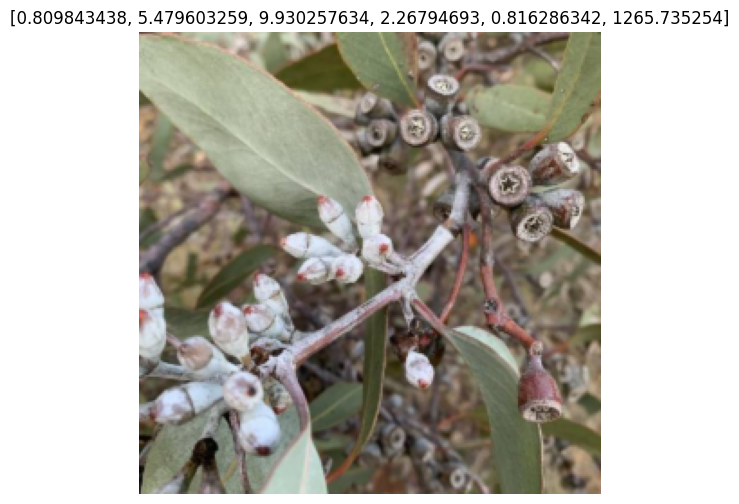

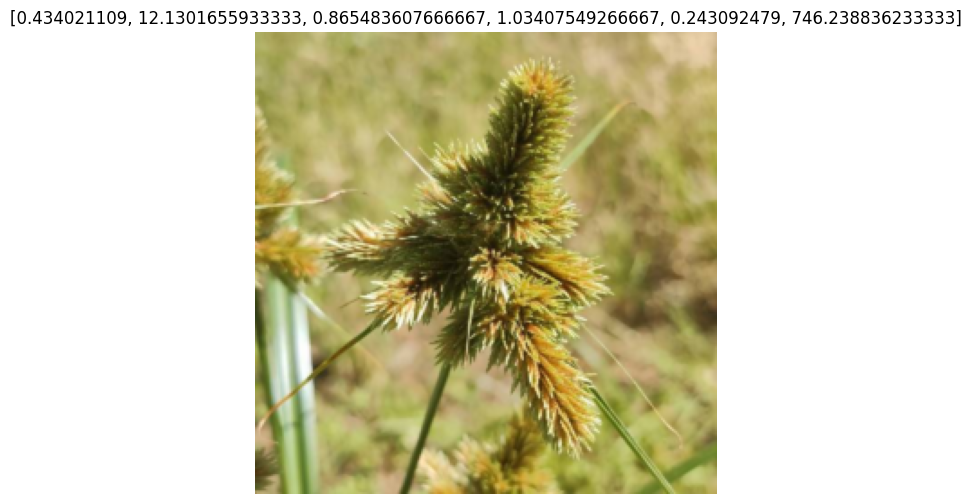

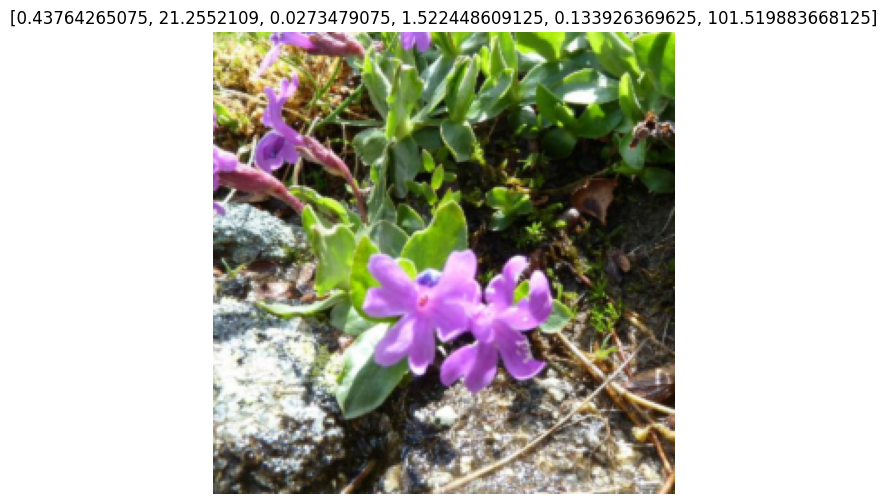

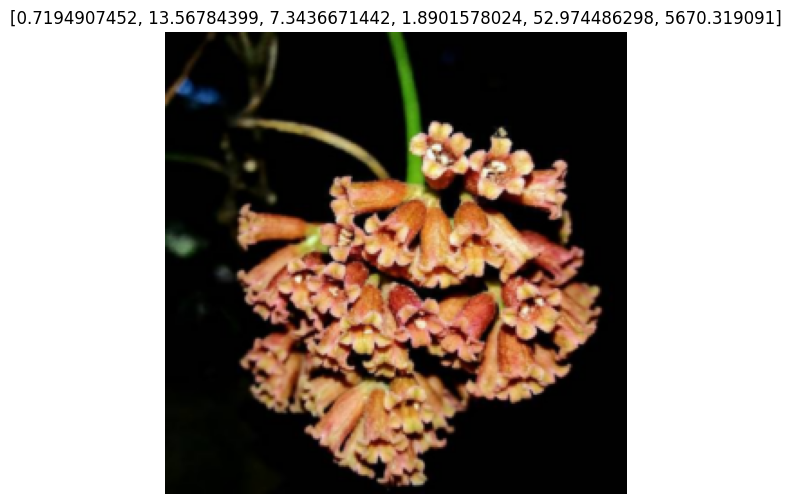

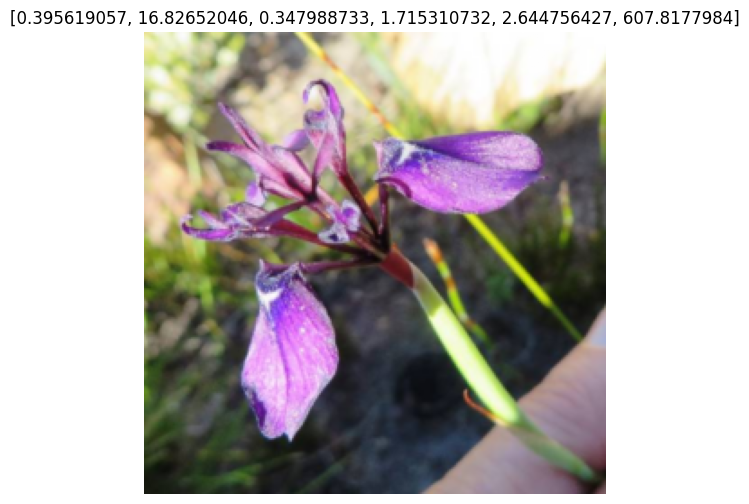

In [24]:
for idx, (image, label) in enumerate(zip(images, labels)):
    if idx >= 5:
        break
    image = image.permute(1, 2, 0)
    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.title(label.tolist())
    plt.show()


In [25]:
class CNNModel(nn.Module):
    def __init__(self, num_classes : int):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = (3, 3), stride = (1, 1), padding = "same")
        self.conv2 = nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = (3, 3), stride = (1, 1), padding = "same")
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = (3, 3), stride = (1, 1), padding = "same")
        self.conv4 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = (3, 3), stride = (1, 1), padding = "same")

        self.pool = nn.MaxPool2d(kernel_size = (2, 2))
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(in_features = 256 * 16 * 16, out_features = 512)
        self.fc2 = nn.Linear(in_features = 512, out_features = 128)
        self.fc3 = nn.Linear(in_features = 128, out_features = num_classes)

    def forward(self, x):
        x = torch.relu(self.pool(self.conv1(x)))
        x = torch.relu(self.pool(self.conv2(x)))
        x = torch.relu(self.pool(self.conv3(x)))
        x = torch.relu(self.pool(self.conv4(x)))
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [27]:
num_classes = 6
model = CNNModel(num_classes = num_classes).to(device)
criterion = nn.MSELoss()
num_epochs = 12
optimizer = optim.Adam(params = model.parameters(), lr = 0.01)

In [28]:
def train(train_loader, val_loader, model, criterion, optimizer, num_epochs, device):
    training_loss_history = []
    val_loss_history = []

    for epoch in range(num_epochs):
        running_train_loss = 0
        model.train()

        for images, labels in train_loader:
            optimizer.zero_grad()
            images, labels = images.to(device).float(), labels.to(device).float()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()
        epoch_train_loss = running_train_loss / len(train_loader)
        training_loss_history.append(epoch_train_loss)

        model.eval()
        with torch.no_grad():
            running_val_loss = 0
            for images, labels  in val_loader:
                images, labels = images.to(device).float(), labels.to(device).float()
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()
            epoch_val_loss = running_val_loss / len(val_loader)
            val_loss_history.append(epoch_val_loss)

        print(f'Epoch : {epoch+1}/{num_epochs} ---> Training Loss : {epoch_train_loss}, Validation Loss : {epoch_val_loss}')

    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.plot(training_loss_history, color = 'b')
    plt.xlabel('Epochs')
    plt.ylabel('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(val_loss_history, color = 'r')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')

Epoch : 1/12 ---> Training Loss : 1616887079131.3167, Validation Loss : 146513712.9
Epoch : 2/12 ---> Training Loss : 1616890108105.5208, Validation Loss : 147463905.925
Epoch : 3/12 ---> Training Loss : 1616884977794.35, Validation Loss : 188192342.8
Epoch : 4/12 ---> Training Loss : 1616883821813.9084, Validation Loss : 162777001.6
Epoch : 5/12 ---> Training Loss : 1616860107516.3667, Validation Loss : 148442277.45
Epoch : 6/12 ---> Training Loss : 1616884532759.1584, Validation Loss : 163255470.2
Epoch : 7/12 ---> Training Loss : 1616889541723.525, Validation Loss : 148195899.75
Epoch : 8/12 ---> Training Loss : 1616895496901.2834, Validation Loss : 149256561.25
Epoch : 9/12 ---> Training Loss : 1616863265252.5417, Validation Loss : 157112564.1
Epoch : 10/12 ---> Training Loss : 1616876255012.175, Validation Loss : 160885131.0
Epoch : 11/12 ---> Training Loss : 1616881479643.5, Validation Loss : 147392864.225
Epoch : 12/12 ---> Training Loss : 1616894688453.9333, Validation Loss : 1

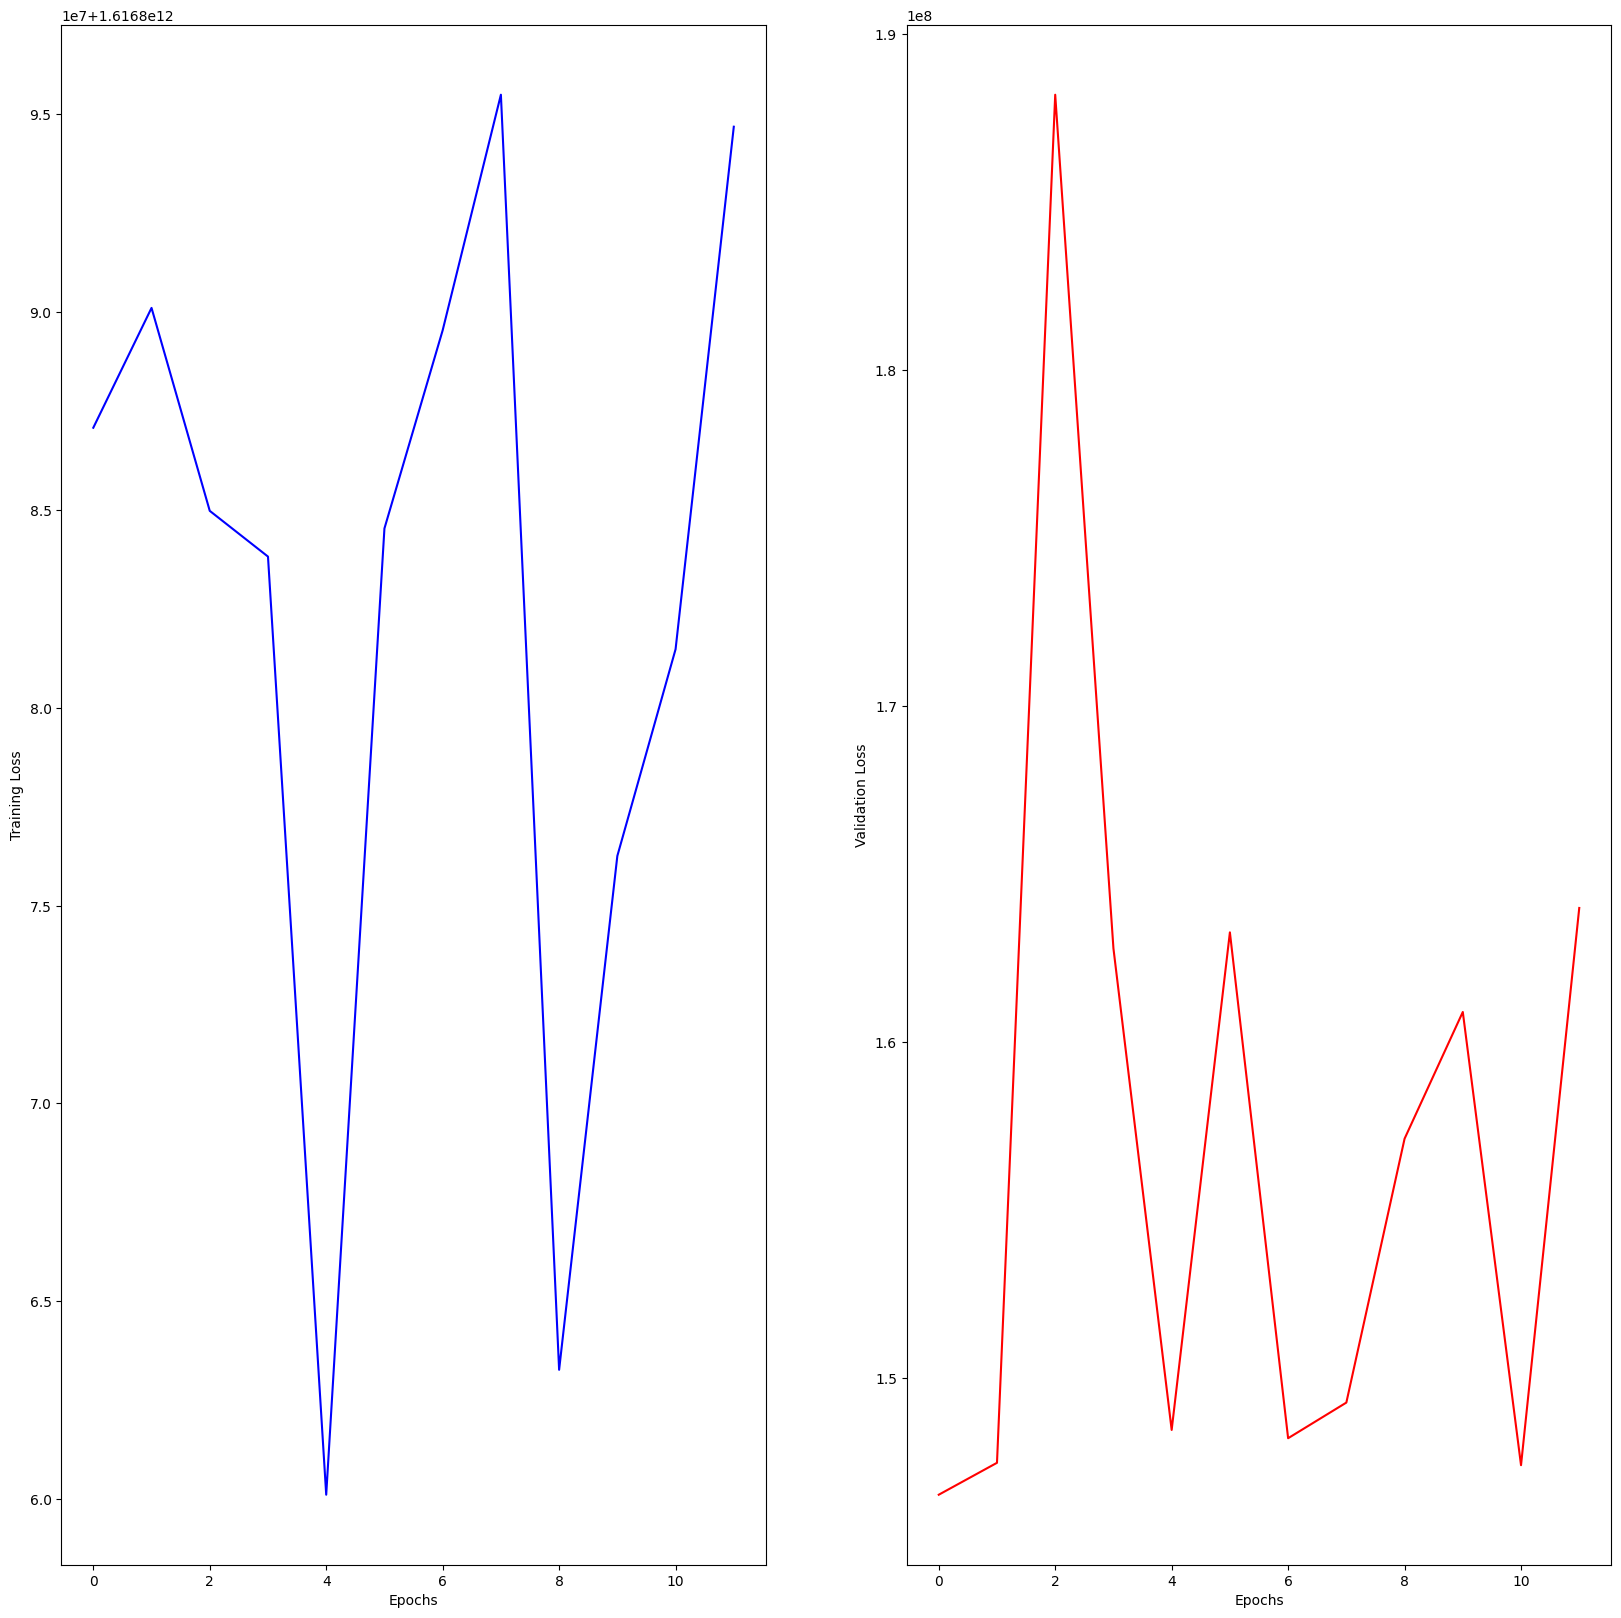

In [29]:
train(train_loader, val_loader, model, criterion, optimizer, num_epochs, device)